In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
img_array=cv2.imread("dataset/with_mask/with_mask180.jpg")

In [3]:
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

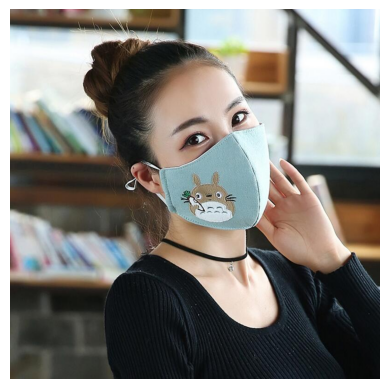

In [4]:
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [5]:
img_array.shape

(800, 800, 3)

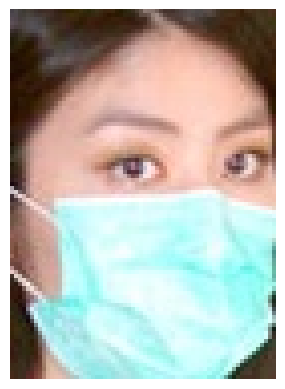

In [6]:
data_directory="dataset/"
classes=["with_mask","without_mask"]
for category in classes:
    path=os.path.join(data_directory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        break
    break

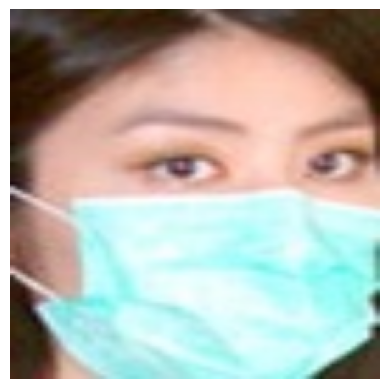

In [7]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
# Display the resized image using Matplotlib
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [8]:
traning_data=[]
def create_traning_data():
    for category in classes:
        path=os.path.join(data_directory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                traning_data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_traning_data()

In [10]:
print(len(traning_data))

6073


In [11]:
import random
random.shuffle(traning_data)

In [12]:
x=[]
y=[]
for features,label in traning_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,3)   

In [13]:
x.shape

(6073, 224, 224, 3)

Print Features 

In [14]:
num_features_to_print = 10

for i in range(min(num_features_to_print, len(x))):
    print(f"Features {i + 1}:")
    print(x[i])  # Print features
    print("-" * 20)

Features 1:
[[[26 24 24]
  [26 24 24]
  [25 23 23]
  ...
  [14 14 14]
  [15 15 15]
  [15 15 15]]

 [[25 23 23]
  [25 23 23]
  [24 22 22]
  ...
  [14 14 14]
  [14 14 14]
  [14 14 14]]

 [[24 22 22]
  [24 22 22]
  [23 21 21]
  ...
  [13 13 13]
  [13 13 13]
  [13 13 13]]

 ...

 [[11 10  9]
  [11 10  9]
  [12 10  9]
  ...
  [42 64 97]
  [42 65 97]
  [42 65 97]]

 [[12 11 11]
  [12 11 11]
  [11 11 11]
  ...
  [43 63 97]
  [43 64 98]
  [43 64 98]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]
  ...
  [43 63 98]
  [44 64 99]
  [44 64 99]]]
--------------------
Features 2:
[[[165 174 201]
  [166 175 202]
  [164 173 200]
  ...
  [102 103 124]
  [102 102 123]
  [103 101 123]]

 [[175 183 211]
  [170 179 206]
  [162 171 198]
  ...
  [105 106 127]
  [105 104 126]
  [105 103 125]]

 [[172 180 207]
  [164 172 199]
  [151 159 186]
  ...
  [107 108 129]
  [107 107 128]
  [106 104 126]]

 ...

 [[237 232 234]
  [231 226 228]
  [226 221 223]
  ...
  [ 34  34  47]
  [ 39  39  53]
  [ 45  45  59]]

 [[228 223 

Print Labels

In [15]:
num_labels_to_print = 10

for i in range(min(num_labels_to_print, len(y))):
    print(f"Label {i + 1}: {y[i]}")

Label 1: 0
Label 2: 0
Label 3: 1
Label 4: 0
Label 5: 0
Label 6: 1
Label 7: 1
Label 8: 0
Label 9: 0
Label 10: 1


In [16]:
x=x/255

In [17]:
y[1000]

1

In [18]:
y=np.array(y)

In [19]:
import pickle

In [20]:
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

In [21]:
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [22]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

In [23]:
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [24]:
from tensorflow import keras
from keras import layers

In [25]:
model=tf.keras.applications.mobilenet.MobileNet()

In [26]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [27]:
base_input=model.layers[0].input

In [28]:
base_output=model.layers[-4].output

In [29]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation("sigmoid")(final_output)

In [30]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [31]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

FACE MASK/No FACE MASK

In [32]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [33]:
history = new_model.fit(x,y,epochs=15,validation_split=0.3)

Epoch 1/15
133/133 [==============================] - 352s 3s/step - loss: 0.0769 - accuracy: 0.9755 - precision: 0.9749 - recall: 0.9720 - val_loss: 0.1336 - val_accuracy: 0.9841 - val_precision: 0.9962 - val_recall: 0.9679
Epoch 2/15
133/133 [==============================] - 331s 2s/step - loss: 0.0151 - accuracy: 0.9948 - precision: 0.9959 - recall: 0.9929 - val_loss: 0.0870 - val_accuracy: 0.9780 - val_precision: 1.0000 - val_recall: 0.9506
Epoch 3/15
133/133 [==============================] - 332s 2s/step - loss: 0.0210 - accuracy: 0.9951 - precision: 0.9949 - recall: 0.9944 - val_loss: 0.0753 - val_accuracy: 0.9808 - val_precision: 0.9802 - val_recall: 0.9765
Epoch 4/15
133/133 [==============================] - 329s 2s/step - loss: 0.0213 - accuracy: 0.9932 - precision: 0.9934 - recall: 0.9918 - val_loss: 0.2360 - val_accuracy: 0.9495 - val_precision: 0.9945 - val_recall: 0.8914
Epoch 5/15
133/133 [==============================] - 331s 2s/step - loss: 0.0120 - accuracy: 0.9955

In [34]:
new_model.save("fmd_model.keras")

In [35]:
new_model=tf.keras.models.load_model("fmd_model.keras")

Cheking Prediction (with mask images)

In [36]:
frame=cv2.imread("dataset/with_mask/0_0_0 copy 47.jpg") 

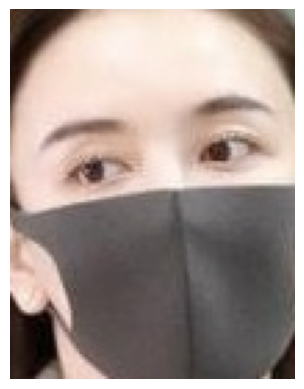

In [37]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [38]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255

In [39]:
prediction=new_model.predict(final_image)
prediction

1/1 [==============================] - 0s 381ms/step


array([[1.1927286e-05]], dtype=float32)

Cheking Prediction (with_out mask images)

In [40]:
frame=cv2.imread("bulbul-ahmed-cIEb4UJ4ruk-unsplash.jpg")

In [41]:
frame.shape

(3840, 3840, 3)

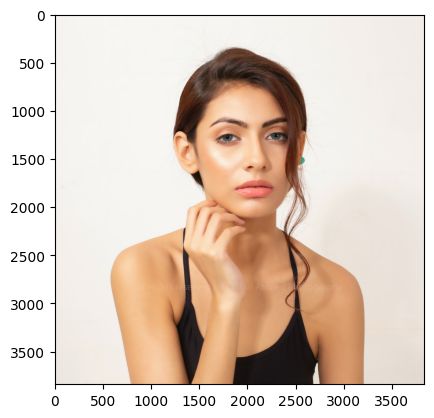

In [42]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

In [43]:
facecascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [44]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [45]:
gray.shape

(3840, 3840)

In [46]:
face=facecascade.detectMultiScale(gray,4)
for x,y,w,h in face:
    roi_color=frame[y:y+h,x:x+w]
    roi_gray=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)
    face=facecascade.detectMultiScale(roi_gray)
    if len(face)==0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in face:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

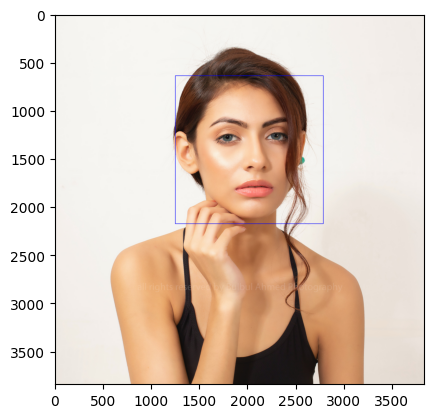

In [47]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

In [48]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255

In [49]:
prediction=new_model.predict(final_image)
prediction

1/1 [==============================] - 0s 32ms/step


array([[0.9999999]], dtype=float32)

Real Time Face Mask Detection

In [50]:
# import cv2
# import numpy as np
# from keras.models import load_model
# 
# # Load the pre-trained face mask detection model
# model = load_model("fmd_model.keras")
# 
# # Load the Haar Cascade classifier for face detection
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# 
# # Open a webcam or video capture source (0 for default camera)
# try:
#     cap = cv2.VideoCapture(0)
# except IOError:
#     raise IOError("Cannot open webcam")
# 
# # Font settings for displaying text
# font_scale = 1.5
# font = cv2.FONT_HERSHEY_PLAIN
# 
# while True:
#     ret, frame = cap.read()
# 
#     if not ret:
#         continue
# 
#     # Convert the frame to grayscale for face detection
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# 
#     # Detect faces in the grayscale frame
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
# 
#     for (x, y, w, h) in faces:
#         # Check if face detection returned any faces
#         if len(faces) > 0:
#             # Extract the region of interest (ROI) for face detection
#             face_roi = gray[y:y + h, x:x + w]
# 
#             # Resize and preprocess the face ROI for prediction
#             final_image = cv2.resize(face_roi, (224, 224))
#             final_image = np.expand_dims(final_image, axis=-1)
#             final_image = np.repeat(final_image, 3, axis=-1)  # Convert to (224, 224, 3)
#             final_image = np.expand_dims(final_image, axis=0) / 255.0
# 
#             # Predict whether a mask is present or not
#             prediction = model.predict(final_image)
# 
#             # Determine status based on prediction
#             if prediction > 0.5:
#                 status = "No Mask"
#                 color = (0, 0, 255)  # Red for "No Mask"
#             else:
#                 status = "Mask"
#                 color = (0, 255, 0)  # Green for "Mask"
# 
#             # Take appropriate action based on prediction (e.g., warning, logging)
#             # ...
# 
#             # Draw a rectangle around the detected face and display the status
#             cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)
#             cv2.putText(frame, status, (x, y - 10), font, fontScale=font_scale, color=color, thickness=3)
# 
#     # Display the frame
#     cv2.imshow("Face Mask Detection", frame)
# 
#    # Exit the loop when the 'q' key is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# 
# # Release the video capture object and close all OpenCV windows
# cap.release()
# cv2.destroyAllWindows()


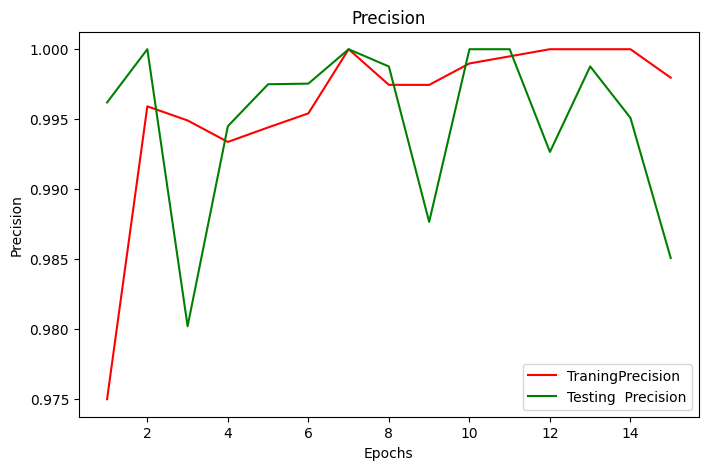

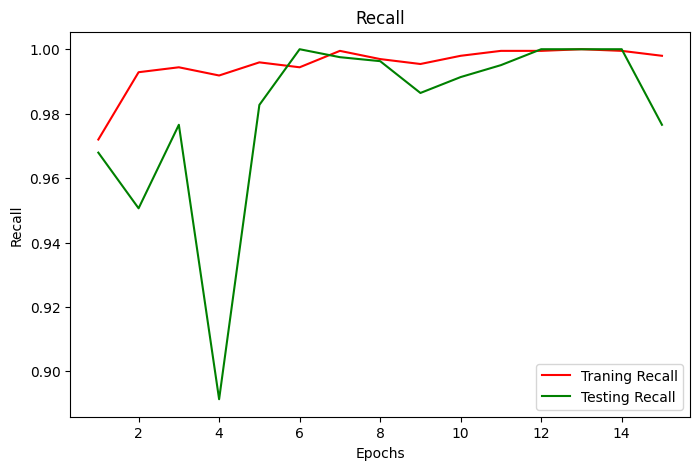

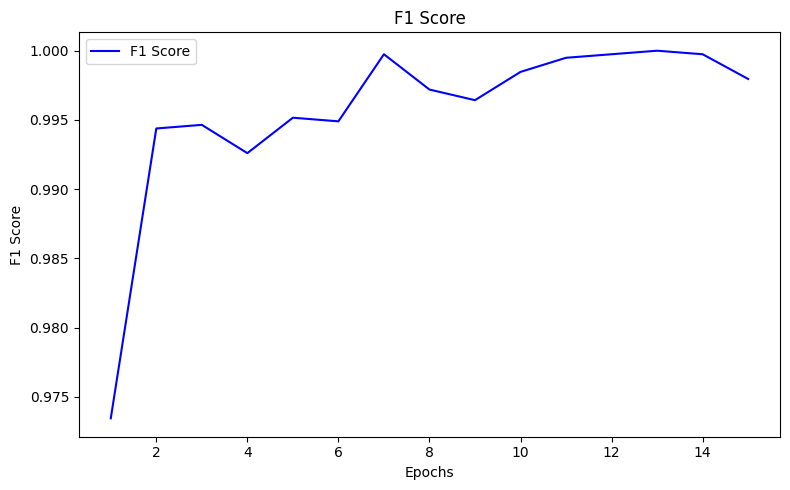

In [56]:
if 'precision' in history.history and 'recall' in history.history:
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']

    epochs = range(1, len(precision) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, precision, 'r', label='TraningPrecision')
    plt.plot(epochs, val_precision, 'g', label='Testing  Precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, recall, 'r', label='Traning Recall')
    plt.plot(epochs, val_recall, 'g', label='Testing Recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Calculate F1 score based on precision and recall
    f1 = [2 * ((p * r) / (p + r)) for p, r in zip(precision, recall)]
    

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, f1, 'b', label='F1 Score')
    plt.title('F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Error in the training")


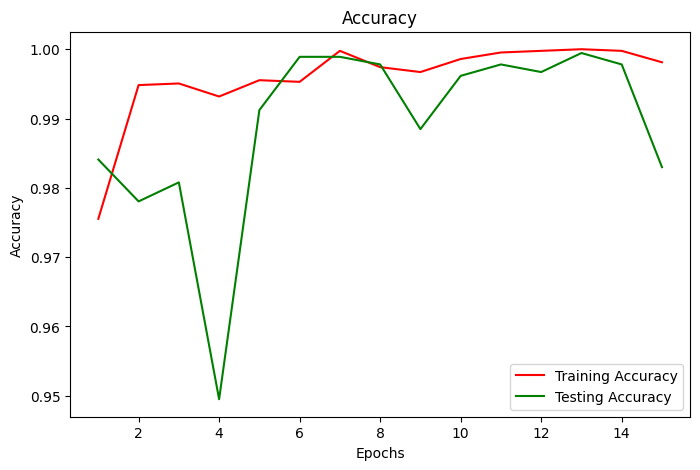

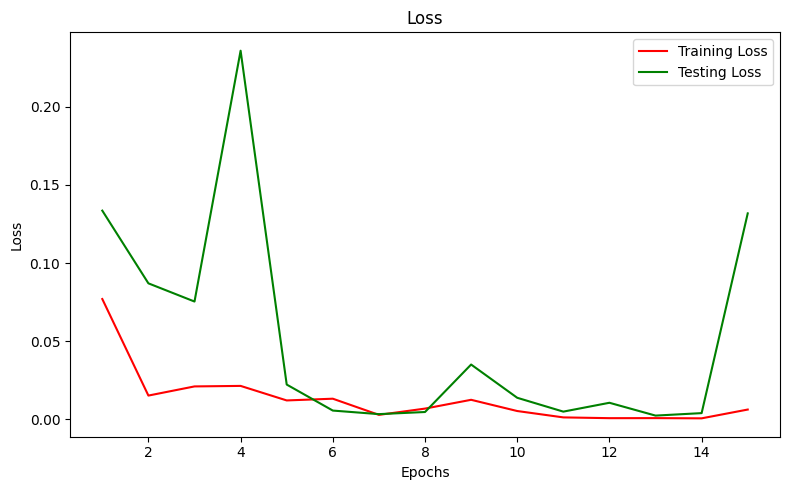

In [54]:
if 'accuracy' in history.history and 'loss' in history.history:
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(8, 5))

    plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Testing Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.figure(figsize=(8, 5))

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Testing Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Error in the training")
